In [1]:
import torch
from torch import nn, optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from d2l import torch as d2l

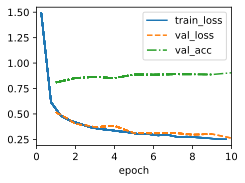

In [2]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

class NiN_FC(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nn.Flatten(),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model = NiN_FC(lr=0.05)

device = "cuda:0"
model = model.to(device=device)
first_batch = next(iter(data.get_dataloader(train=True)))[0].to(device)
model.apply_init([first_batch], d2l.init_cnn)
for epoch in range(trainer.max_epochs):
    for x, y in data.get_dataloader(train=True):
        x, y = x.to(device), y.to(device)
trainer.fit(model, data)


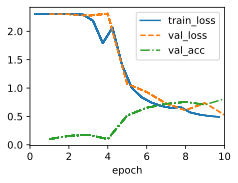

In [3]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model1 = NiN(lr=0.05)

device = "cuda:0"
model1 = model1.to(device=device)
first_batch = next(iter(data.get_dataloader(train=True)))[0].to(device)
model1.apply_init([first_batch], d2l.init_cnn)
for epoch in range(trainer.max_epochs):
    for x, y in data.get_dataloader(train=True):
        x, y = x.to(device), y.to(device)
trainer.fit(model1, data)


In [4]:
num_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
num_params

1992166

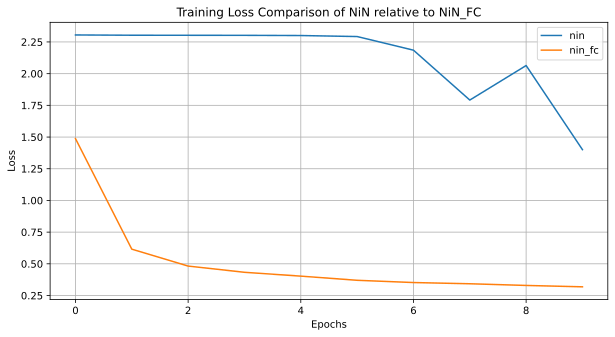

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot([model1.board.data['train_loss'][i][1] for i in range(10)],label='nin')
plt.plot([model.board.data['train_loss'][i][1] for i in range(10)], label='nin_fc')
plt.title('Training Loss Comparison of NiN relative to NiN_FC')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

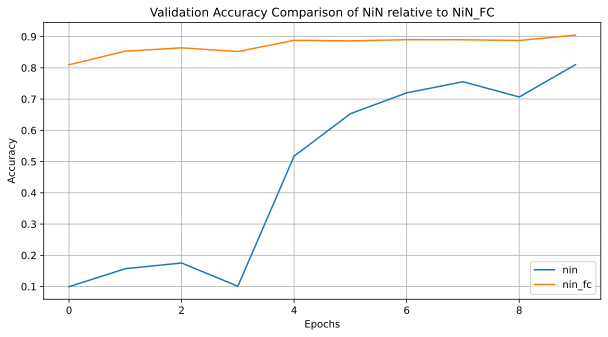

: 

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot([model1.board.data['val_acc'][i][1] for i in range(10)],label='nin')
plt.plot([model.board.data['val_acc'][i][1] for i in range(10)], label='nin_fc')
plt.title('Validation Accuracy Comparison of NiN relative to NiN_FC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()